<a href="https://colab.research.google.com/github/Sushant1805/DL-Assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression from Scratch and Using Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR_sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset from Google Drive (or local storage)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_2023.csv")

# Drop unnecessary columns (id column if present)
df = df.drop(columns=['id'], errors='ignore')

# Define Features (X) and Target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ========== Logistic Regression From Scratch ==========

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the loss (Log Loss)
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss for binary classification.

    Parameters:
    y_true : numpy array
        True labels (0 or 1), shape (m,)
    y_pred : numpy array
        Predicted probabilities, shape (m,)

    Returns:
    float
        Cross-entropy loss
    """
    # Avoid log(0) errors by clipping values
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Initialize weights and bias
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Compute gradients
def compute_gradients(X, y, weights, bias):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, weights) + bias)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

# Train logistic regression using gradient descent
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)

    for i in range(epochs):
        dw, db = compute_gradients(X, y, weights, bias)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        # Compute loss every 100 iterations
        if i % 100 == 0:
            y_pred = sigmoid(np.dot(X, weights) + bias)
            loss = compute_loss(y, y_pred)
            cross_entropy = cross_entropy_loss(y,y_pred)
            print(f"Epoch {i}: Loss = {loss:.4f}: Cross Entropy Loss = {cross_entropy:.4f}")

    return weights, bias

# Train model from scratch
weights, bias = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

# Make predictions from scratch model
def predict(X, weights, bias, threshold=0.5):
    linear_output = np.dot(X, weights) + bias
    probabilities = sigmoid(linear_output)
    return (probabilities >= threshold).astype(int)

y_pred_train_scratch = predict(X_train, weights, bias)
y_pred_test_scratch = predict(X_test, weights, bias)

# ========== Logistic Regression using scikit-learn ==========

# Train logistic regression model using scikit-learn
model_sklearn = LR_sklearn()
model_sklearn.fit(X_train, y_train)

# Make predictions with scikit-learn model
y_pred_train_sklearn = model_sklearn.predict(X_train)
y_pred_test_sklearn = model_sklearn.predict(X_test)

# ========== Evaluation ==========

# Evaluate all models
print("\n==== Evaluation for Logistic Regression (From Scratch) ====")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_scratch):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_scratch):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred_test_scratch):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_test_scratch):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_test_scratch):.4f}")

print("\n==== Evaluation for Logistic Regression (scikit-learn) ====")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_sklearn):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_sklearn):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred_test_sklearn):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_test_sklearn):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_test_sklearn):.4f}")



Epoch 0: Loss = 0.6794: Cross Entropy Loss = 0.6794
Epoch 100: Loss = 0.3190: Cross Entropy Loss = 0.3190
Epoch 200: Loss = 0.2614: Cross Entropy Loss = 0.2614
Epoch 300: Loss = 0.2342: Cross Entropy Loss = 0.2342
Epoch 400: Loss = 0.2171: Cross Entropy Loss = 0.2171
Epoch 500: Loss = 0.2049: Cross Entropy Loss = 0.2049
Epoch 600: Loss = 0.1955: Cross Entropy Loss = 0.1955
Epoch 700: Loss = 0.1880: Cross Entropy Loss = 0.1880
Epoch 800: Loss = 0.1818: Cross Entropy Loss = 0.1818
Epoch 900: Loss = 0.1765: Cross Entropy Loss = 0.1765

==== Evaluation for Logistic Regression (From Scratch) ====
Train Accuracy: 0.9401
Test Accuracy: 0.9409
Test Precision: 0.9933
Test Recall: 0.8877
Test F1 Score: 0.9376

==== Evaluation for Logistic Regression (scikit-learn) ====
Train Accuracy: 0.9650
Test Accuracy: 0.9649
Test Precision: 0.9770
Test Recall: 0.9523
Test F1 Score: 0.9645


**Relu and TanH Plotting**

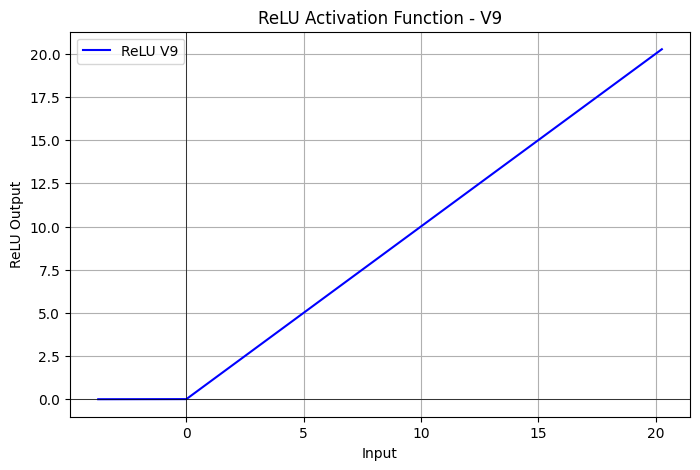

<Figure size 640x480 with 0 Axes>

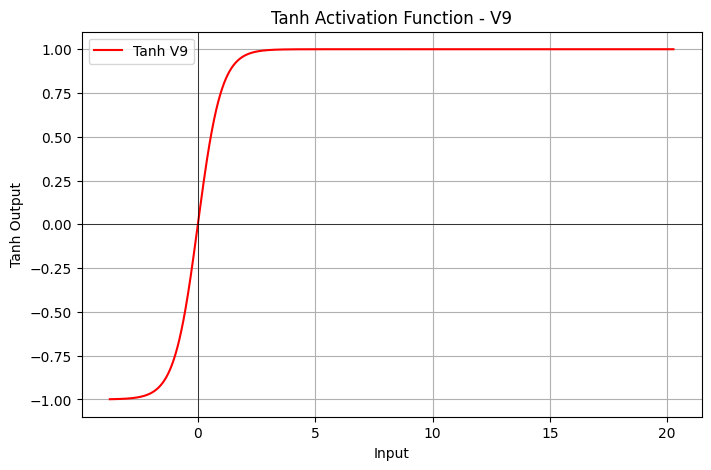

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Credit Card Fraud dataset (replace with your file path)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_2023.csv", delimiter=',')

# Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()

# Select numerical columns to apply activation functions
columns_to_use = ['V9']

# Convert the selected columns to numeric, forcing errors to NaN
df[columns_to_use] = df[columns_to_use].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the selected columns
df_cleaned = df.dropna(subset=columns_to_use)

# Extract the cleaned numerical data
data = df_cleaned[columns_to_use].values

# Sort the data (optional, just for visualization purpose)
data_sorted = np.sort(data, axis=0)

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Apply activation functions
relu_data = relu(data_sorted)
tanh_data = tanh(data_sorted)

# Plot ReLU Activation Function
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, relu_data, label='ReLU V9', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('ReLU Activation Function - V9')
plt.xlabel('Input')
plt.ylabel('ReLU Output')
plt.grid()
plt.show()

# Add space between plots
plt.subplots_adjust(hspace=0.5)

# Plot Tanh Activation Function
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, tanh_data, label='Tanh V9', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Tanh Activation Function - V9')
plt.xlabel('Input')
plt.ylabel('Tanh Output')
plt.grid()
plt.show()


**ANN USING KERAS**

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with the correct path)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_2023.csv")

# Drop the 'id' column since it's not useful for classification
df = df.drop(columns=['id'], errors='ignore')

# Separate features (X) and target (y)
X = df.drop(columns=['Class'])  # All columns except 'Class' are features
y = df['Class']  # 'Class' is the target (0 = legitimate, 1 = fraud)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (scale features for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)        # Transform test data using the same scaler

# Print shapes of train-test sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (454904, 29), X_test shape: (113726, 29)
y_train shape: (454904,), y_test shape: (113726,)


In [ ]:

model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9968 - val_loss: 0.0106
Epoch 2/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9983 - val_loss: 0.0064
Epoch 3/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9988 - val_loss: 0.0053
Epoch 4/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9982 - val_loss: 0.0058
Epoch 5/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9985 - val_loss: 0.0053


In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9988 - loss: 0.0046
Test Loss: 0.0055
Test Accuracy: 0.9986


In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype(int)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



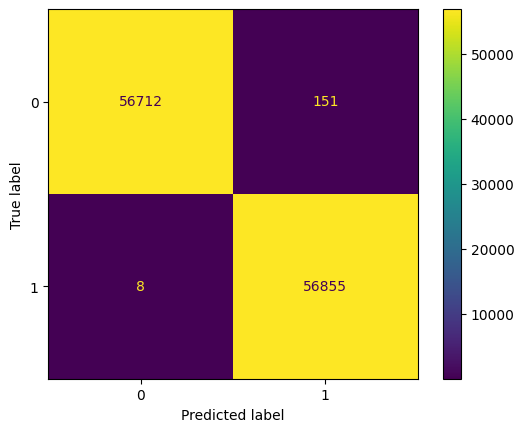

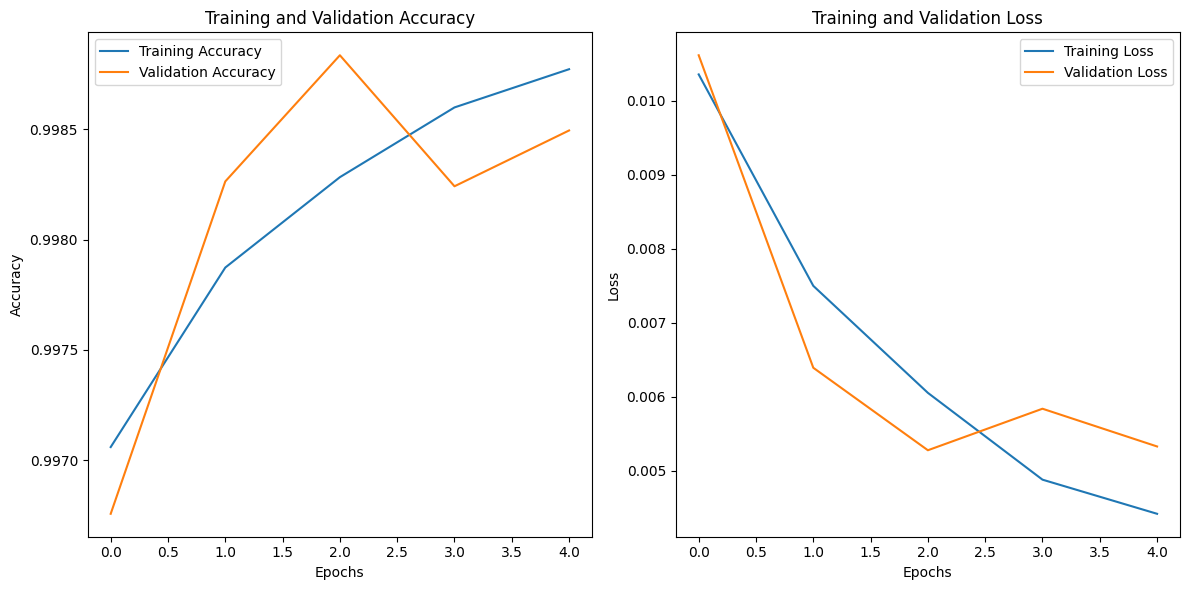

In [ ]:

# Step 7: Classification Report
# Print a detailed classification report with precision, recall, F1-score, and support for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
# Plot the confusion matrix to visualize model performance in terms of true positives, true negatives, false positives, and false negatives
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


**ANN WITH BACK PROPOGATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_2023.csv")

# Drop 'id' column if present
df = df.drop(columns=['id'], errors='ignore')

# Separate features (X) and target (y)
X = df.drop(columns=['Class']).values
y = df['Class'].values.reshape(-1, 1)  # Reshape target to column vector

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize neural network parameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
alpha = 0.01
epochs = 1000

# Random weight initialization
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Cross-entropy loss
def cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

# Store loss values
loss_history = []

# Training process with backpropagation
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss
    loss = cross_entropy(y_train, A2)
    loss_history.append(loss)  # Store loss for plotting

    # Backpropagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / len(y_train)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(y_train)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1) / len(y_train)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(y_train)

    # Update weights
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W1 -= alpha * dW1
    b1 -= alpha * db1

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label="Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title("Loss Curve for ANN with Backpropagation")
plt.legend()
plt.grid()
plt.show()


Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6931
Epoch 200, Loss: 0.6930
Epoch 300, Loss: 0.6929
Epoch 400, Loss: 0.6927
Epoch 500, Loss: 0.6923
Epoch 600, Loss: 0.6916
Epoch 700, Loss: 0.6904
Epoch 800, Loss: 0.6883


**ANN FROM SCRATCH**

Epoch 0 - Loss: 0.81455


<ipython-input-17-d7c5b7bc9e20>:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 100 - Loss: 0.03199
Epoch 200 - Loss: 0.02960
Epoch 300 - Loss: 0.06830
Epoch 400 - Loss: 0.02274
Epoch 500 - Loss: 0.02582
Epoch 600 - Loss: 0.02561
Epoch 700 - Loss: 0.02013
Epoch 800 - Loss: 0.01935
Epoch 900 - Loss: 0.02247
Model Accuracy: 99.91%


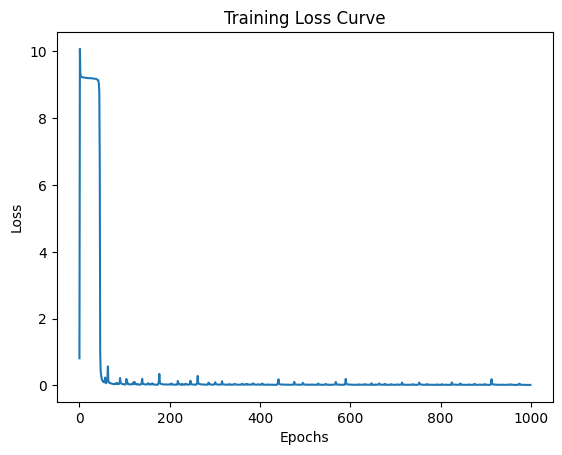

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_2023.csv")

# Select features and target
features = [col for col in df.columns if col not in ['Time', 'Class']]  # Exclude 'Time' column
target = 'Class'

# Shuffle dataset to avoid bias
df = shuffle(df, random_state=42)

# Extract features (X) and target variable (y)
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---------------- ANN Definition ----------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize Weights & Biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Forward Pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output_output = sigmoid(self.output_input)
        return self.output_output

    def backward(self, X, y, learning_rate):
        # Compute Error
        output_error = y - self.output_output
        output_delta = output_error * sigmoid_derivative(self.output_output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update Weights & Biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

            # Compute Loss (Binary Cross-Entropy)
            loss = -np.mean(y * np.log(self.output_output + 1e-8) + (1 - y) * np.log(1 - self.output_output + 1e-8))
            loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch} - Loss: {loss:.5f}")

        return loss_history

# ---------------- Train the Model ----------------
nn = NeuralNetwork(input_size=30, hidden_size=16, output_size=1)
loss_history = nn.train(X_train, y_train, epochs=1000, learning_rate=0.01)

# ---------------- Evaluate the Model ----------------
y_pred = nn.forward(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert to binary (0 or 1)

# Accuracy Calculation
accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# ---------------- Plot Training Loss ----------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
